In [50]:
 #Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# Defining file path
path = '/content/drive/MyDrive/Colab Notebooks/DATAVERSE AFRICA INTERNSHIP/group23_AgricData.xlsx'

In [92]:
# Loading dataset
data = pd.read_excel(path)
df = pd.DataFrame(data)
df.head()

,Location,Age,Education_Level,Gender,Loan_Amount,Interest_Rate,Repayment_Period,Loan_Type,Crop_Yield_Before,Crop_Yield_After,Farm_Size,Income_Before,Income_After,Seeds_Purchased,Fertilizers_Purchased,Machinery_Purchased,Weather_Conditions,Market_Access,Productivity_Improvement_Index
0,Kitui,45,No formal education,Male,229739,17.89,6,General,1468,1465,2.88,81868,112804,232.67,171.03,0,Good,Moderate,0.57
1,Murang'a,38,Secondary education,Female,157238,12.70,24,Equipment,1733,2158,1.55,32346,52508,92.44,103.54,1,Good,High,0.97
2,Kisumu,47,No formal education,Male,152155,10.86,24,Equipment,1961,2506,2.03,45952,78334,147.29,83.08,1,Good,Moderate,1.00
3,Nyeri,58,Secondary education,Female,163350,14.80,24,Fertilizer,2531,2869,1.10,55026,75213,70.49,56.82,0,Good,Moderate,0.57
4,Nyeri,37,Tertiary education,Male,171551,5.15,24,Seeds,2042,2444,2.43,94726,112099,211.23,180.87,1,Good,Low,0.54


In [93]:
# Clean column names by removing leading/trailing spaces and making lowercase
df.columns = df.columns.str.strip().str.lower()

In [94]:
# Convert currency columns to numeric (remove $ and commas)
currency_cols = ['loan_amount', 'income_before', 'income_after']
for col in currency_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Convert categorical columns to proper type
cat_cols = ['location', 'education_level', 'gender', 'loan_type', 'weather_conditions', 'market_access']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Handle missing data if any
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
location                          0
age                               0
education_level                   0
gender                            0
loan_amount                       0
interest_rate                     0
repayment_period                  0
loan_type                         0
crop_yield_before                 0
crop_yield_after                  0
farm_size                         0
income_before                     0
income_after                      0
seeds_purchased                   0
fertilizers_purchased             0
machinery_purchased               0
weather_conditions                0
market_access                     0
productivity_improvement_index    0
dtype: int64


In [95]:
# Impute missing values with median for numeric, mode for categorical
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='category').columns

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


# **EXPLORATORY DATA ANALYSIS**

## **1. Farmer Demographics Analysis**


Farmer Demographics Summary:
                 age
count  128957.000000
mean       39.677575
std        11.562250
min        18.000000
25%        31.000000
50%        40.000000
75%        48.000000
max        70.000000


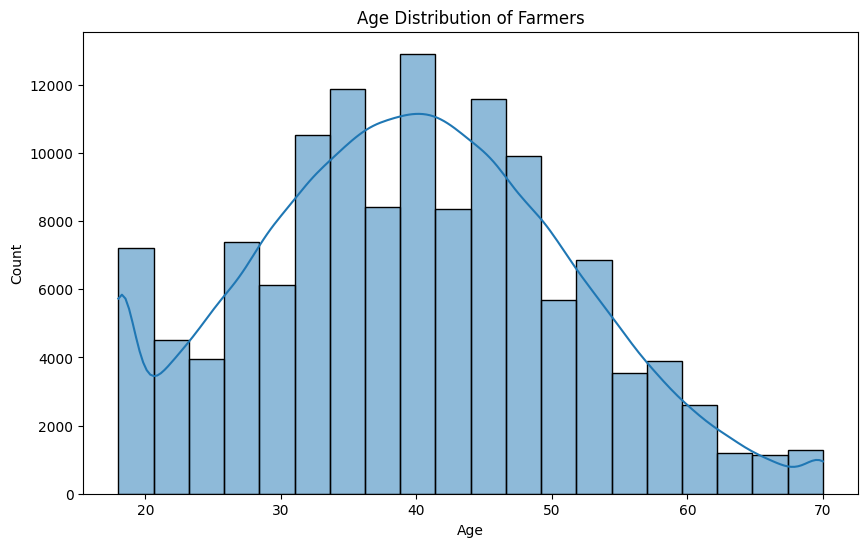

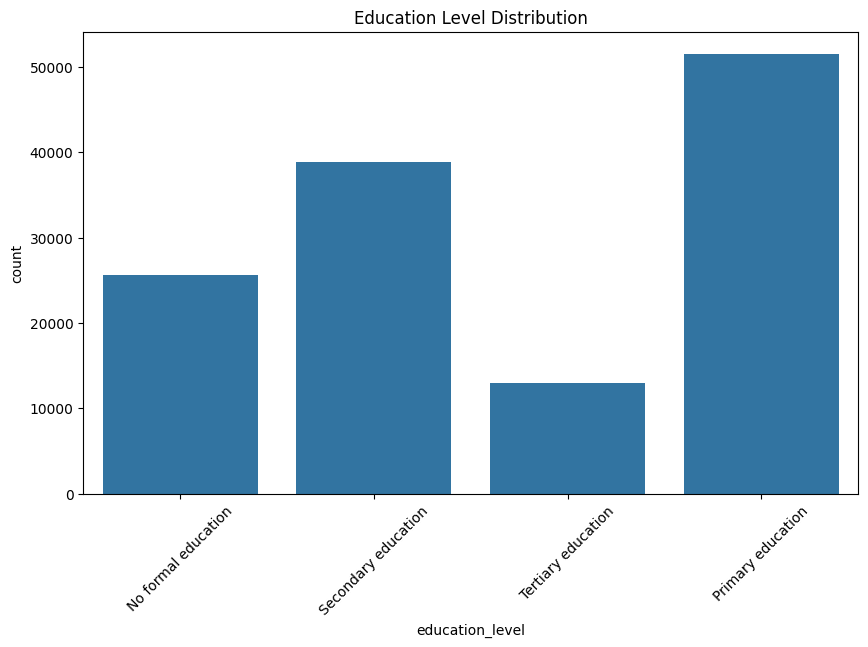

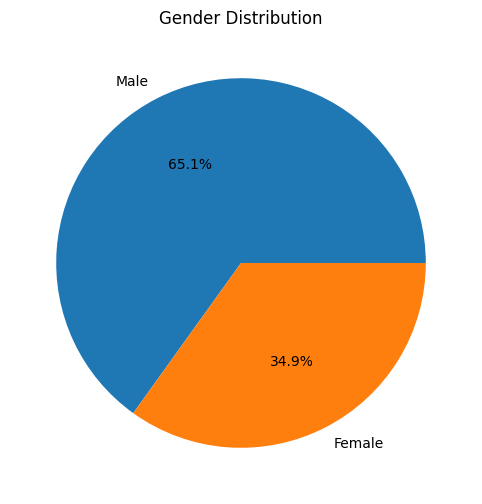

In [96]:

print("\nFarmer Demographics Summary:")
print(df[['age', 'education_level', 'gender']].describe())

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Farmers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("")

# Education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education_level')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

print("")
# Gender distribution
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


**2.Loan Characteristics Analysis**


Loan Characteristics Summary:
         loan_amount  interest_rate  repayment_period
count  128957.000000  128957.000000     128957.000000
mean   200083.495049      11.507933         16.822166
std     79452.966444       3.749365          9.222482
min     10000.000000       5.000000          6.000000
25%    145524.000000       8.270000         12.000000
50%    199818.000000      11.500000         12.000000
75%    253876.000000      14.760000         24.000000
max    500000.000000      18.000000         36.000000


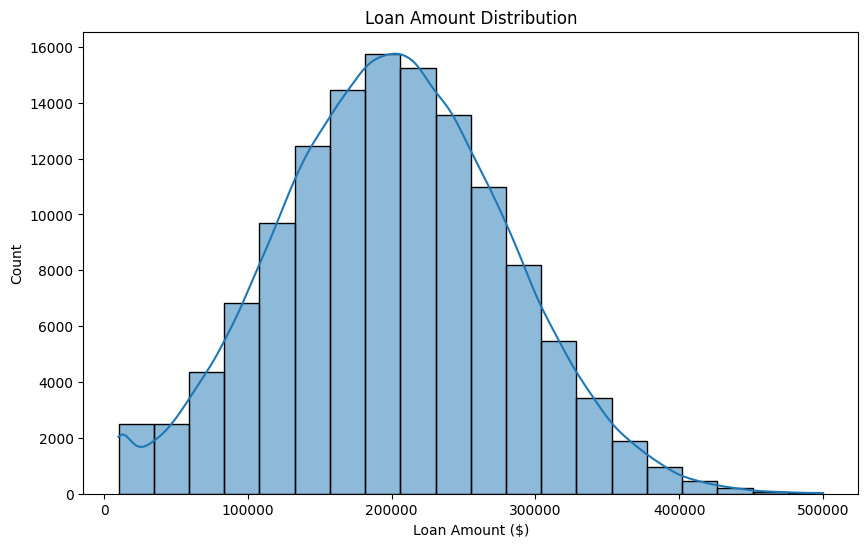

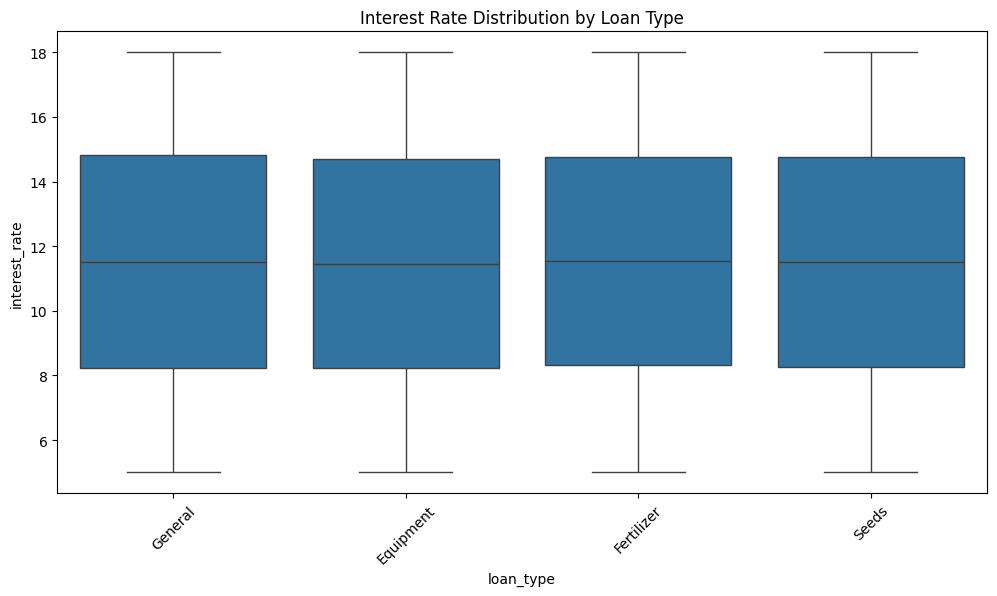

In [97]:

print("\nLoan Characteristics Summary:")
print(df[['loan_amount', 'interest_rate', 'repayment_period', 'loan_type']].describe())

# Loan amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], bins=20, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.show()
print("")

# Interest rate by loan type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='loan_type', y='interest_rate')
plt.title('Interest Rate Distribution by Loan Type')
plt.xticks(rotation=45)
plt.show()

**3.Productivity Metrics Analysis**


Productivity Metrics Summary:
       crop_yield_before  crop_yield_after      farm_size  income_before  \
count      128957.000000     128957.000000  128957.000000  128957.000000   
mean         1999.065037       2298.245392       2.012891   49885.810278   
std           499.308981        521.309263       0.969865   19961.713821   
min          -189.000000         52.000000       0.200000  -44592.000000   
25%          1661.000000       1945.000000       1.320000   36451.000000   
50%          2000.000000       2299.000000       2.000000   49900.000000   
75%          2337.000000       2651.000000       2.680000   63371.000000   
max          4111.000000       4615.000000       5.000000  136318.000000   

        income_after  
count  128957.000000  
mean    64897.019456  
std     22327.374114  
min    -32098.000000  
25%     49992.000000  
50%     64861.000000  
75%     79899.000000  
max    158491.000000  


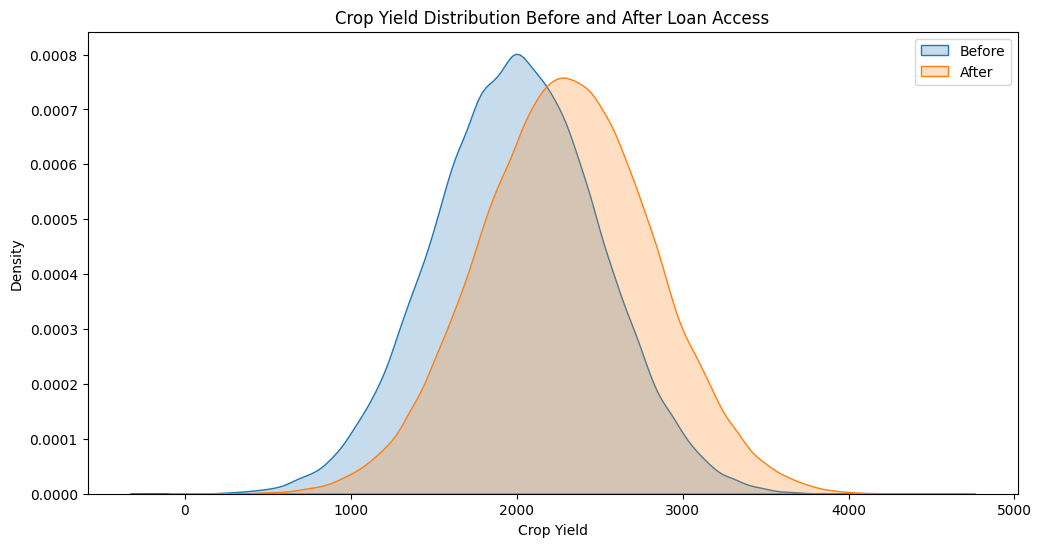

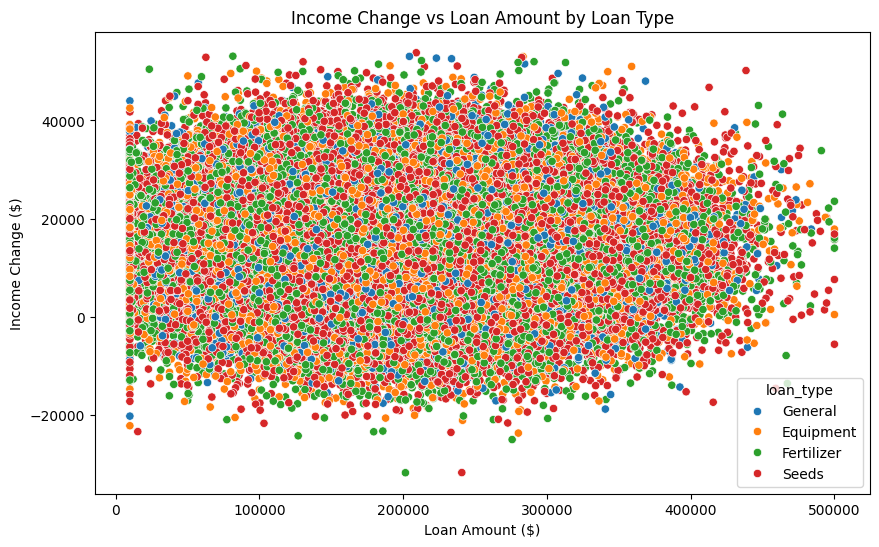

In [98]:

print("\nProductivity Metrics Summary:")
print(df[['crop_yield_before', 'crop_yield_after', 'farm_size', 'income_before', 'income_after']].describe())

# Crop yield before vs after
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='crop_yield_before', label='Before', fill=True)
sns.kdeplot(data=df, x='crop_yield_after', label='After', fill=True)
plt.title('Crop Yield Distribution Before and After Loan Access')
plt.xlabel('Crop Yield')
plt.legend()
plt.show()

print("")
# Income change
df['income_change'] = df['income_after'] - df['income_before']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amount', y='income_change', hue='loan_type')
plt.title('Income Change vs Loan Amount by Loan Type')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Income Change ($)')
plt.show()




**4.Agricultural Inouts Analysis**


Agricultural Inputs Summary:
       seeds_purchased  fertilizers_purchased  machinery_purchased
count    128957.000000          128957.000000        128957.000000
mean        150.960163             100.690074             0.300247
std          79.713025              58.197349             0.458367
min          10.000000               5.000000             0.000000
25%          93.620000              57.700000             0.000000
50%         144.540000              92.720000             0.000000
75%         201.160000             135.770000             1.000000
max         499.920000             374.730000             1.000000


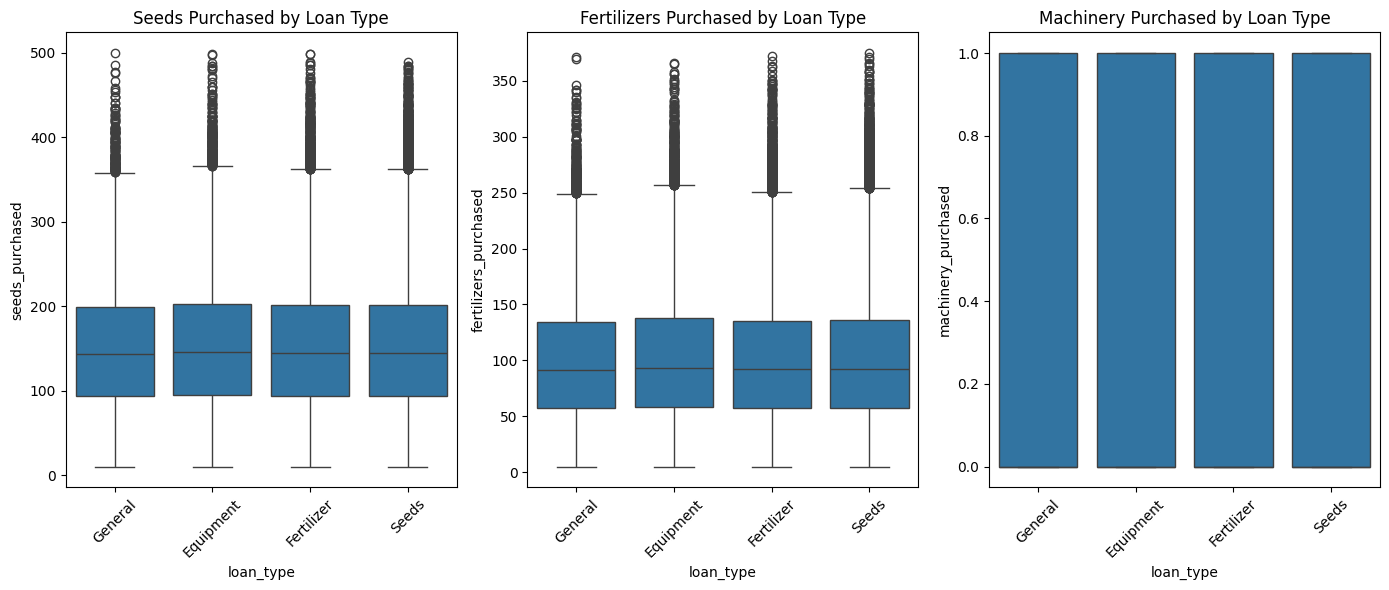

In [19]:
# 4. Agricultural Inputs Analysis
print("\nAgricultural Inputs Summary:")
print(df[['seeds_purchased', 'fertilizers_purchased', 'machinery_purchased']].describe())

# Inputs purchased by loan type
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='loan_type', y='seeds_purchased')
plt.title('Seeds Purchased by Loan Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='loan_type', y='fertilizers_purchased')
plt.title('Fertilizers Purchased by Loan Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='loan_type', y='machinery_purchased')
plt.title('Machinery Purchased by Loan Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**5.External factor analysis**


External Factors Summary:
       weather_conditions market_access
count              128957        128957
unique                  3             3
top                  Good          High
freq                64658         51668


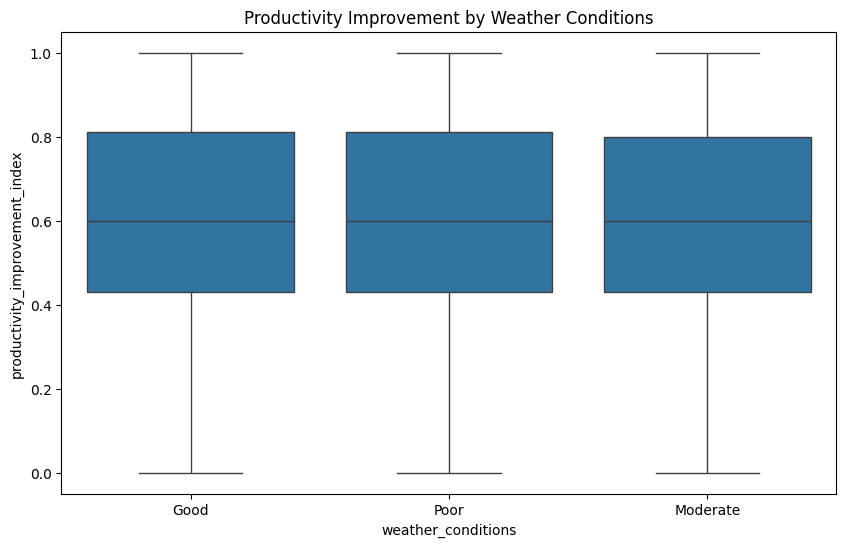

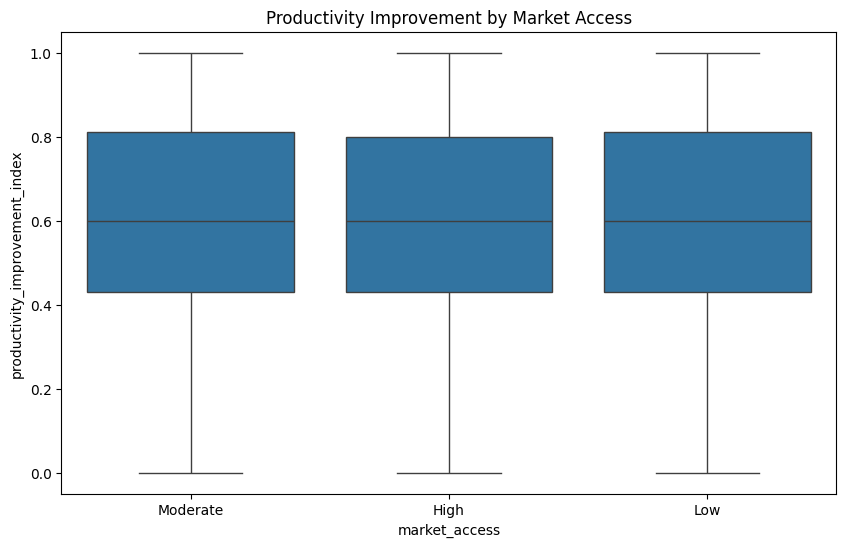

In [20]:

print("\nExternal Factors Summary:")
print(df[['weather_conditions', 'market_access']].describe())

# Productivity by weather conditions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather_conditions', y='productivity_improvement_index')
plt.title('Productivity Improvement by Weather Conditions')
plt.show()
print("")
# Productivity by market access
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='market_access', y='productivity_improvement_index')
plt.title('Productivity Improvement by Market Access')
plt.show()

**Correlation Analysis**



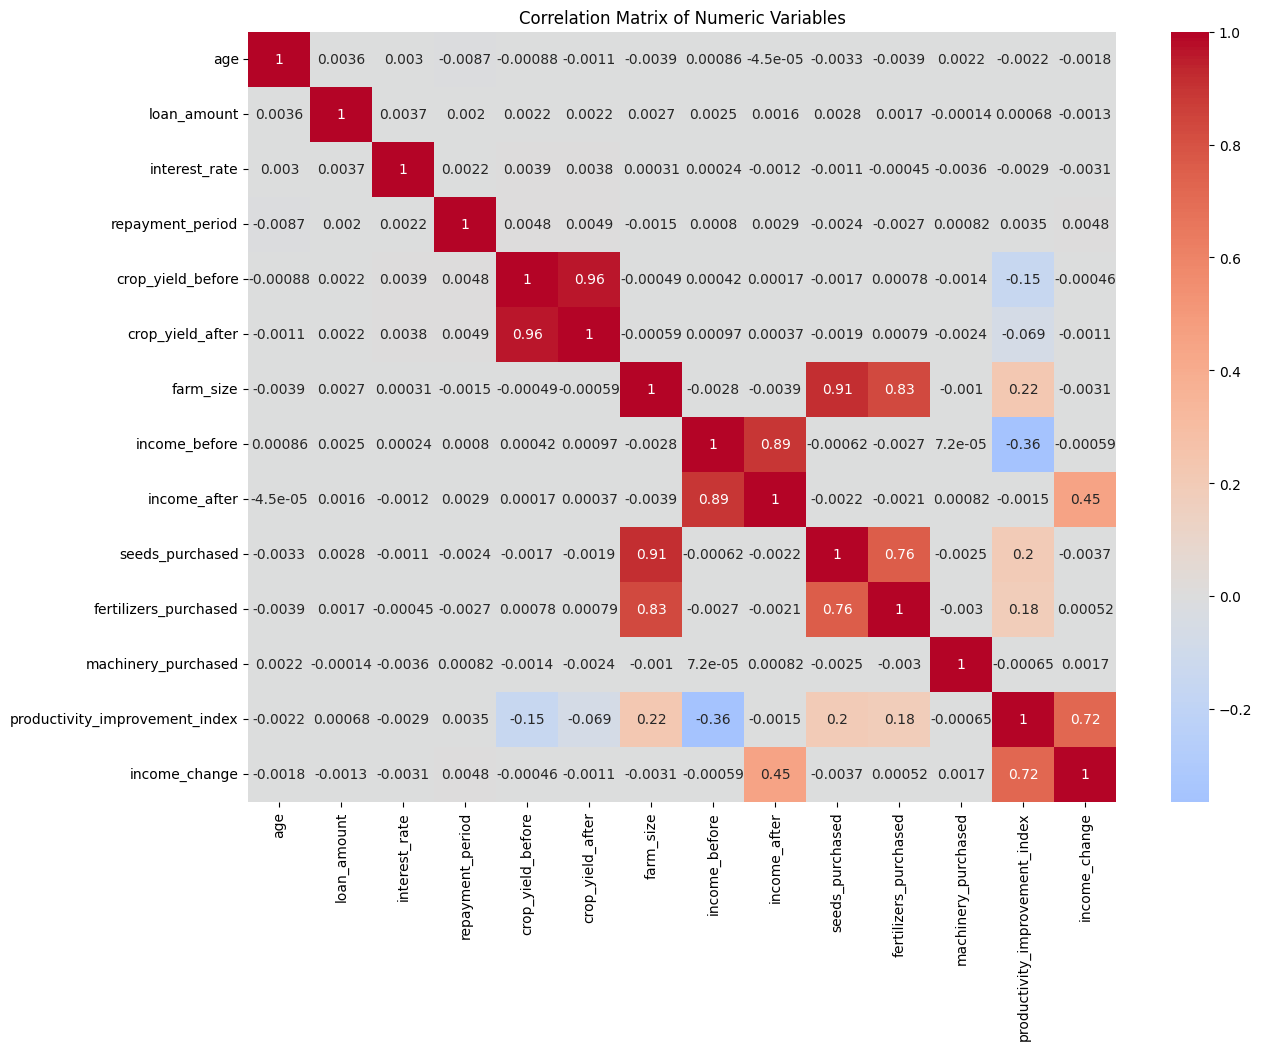

In [99]:

# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Key Performance Indicators (KPIs) Calculation

In [25]:
print("\nKey Performance Indicators (KPIs):")

# 1. Farmer Demographics KPIs
print("\n1. Farmer Demographics KPIs:")
print(f"- Average Age of Farmers: {df['age'].mean():.1f} years")
print(f"- Percentage of Farmers Below 30: {len(df[df['age'] < 30]) / len(df) * 100:.1f}%")
print(f"- Percentage of Farmers Above 50: {len(df[df['age'] > 50]) / len(df) * 100:.1f}%")
print(f"- Percentage of Farmers with Higher Education: {len(df[df['education_level'].str.contains('higher|university', case=False)]) / len(df) * 100:.1f}%")

# Loan access by gender
gender_loan_access = df.groupby('gender')['loan_amount'].count() / len(df) * 100
print("- Loan Access Rate by Gender:")
print(gender_loan_access)
print("")
print("----------------------------------------------------------------------------------------------")
# 2. Loan Characteristics KPIs
print("\n2. Loan Characteristics KPIs:")
print(f"- Average Loan Amount per Farmer: ${df['loan_amount'].mean():,.2f}")
print(f"- Average Interest Rate on Loans: {df['interest_rate'].mean():.2f}%")
print(f"- Average Loan Repayment Period: {df['repayment_period'].mean():.1f} months")

# Percentage of loans by type
loan_type_dist = df['loan_type'].value_counts(normalize=True) * 100
print("- Percentage of Loans by Type:")
print(loan_type_dist)

print("")
print("----------------------------------------------------------------------------------------------")
# 3. Productivity Metrics KPIs
print("\n3. Productivity Metrics KPIs:")
print(f"- Average Crop Yield Before Loan: {df['crop_yield_before'].mean():.1f}")
print(f"- Average Crop Yield After Loan: {df['crop_yield_after'].mean():.1f}")
print(f"- Average Yield Increase: {(df['crop_yield_after'].mean() - df['crop_yield_before'].mean()) / df['crop_yield_before'].mean() * 100:.1f}%")

print(f"- Average Farm Size Before: {df['farm_size'].mean():.2f} hectares")
# Assuming farm_size is after loan (if you have before/after, adjust accordingly)

print(f"- Average Income Before: ${df['income_before'].mean():,.2f}")
print(f"- Average Income After: ${df['income_after'].mean():,.2f}")
print(f"- Average Income Increase: {(df['income_after'].mean() - df['income_before'].mean()) / df['income_before'].mean() * 100:.1f}%")
print("")
print("----------------------------------------------------------------------------------------------")

# 4. Agricultural Inputs KPIs
print("\n4. Agricultural Inputs KPIs:")
print(f"- Percentage of Farmers Using Loan for Seed Purchase: {len(df[df['seeds_purchased'] > 0]) / len(df) * 100:.1f}%")
print(f"- Percentage of Farmers Using Loan for Fertilizers: {len(df[df['fertilizers_purchased'] > 0]) / len(df) * 100:.1f}%")
print(f"- Percentage of Farmers Investing in Farm Equipment: {len(df[df['machinery_purchased'] > 0]) / len(df) * 100:.1f}%")
print("")
print("----------------------------------------------------------------------------------------------")

# 5. External Factors KPIs
print("\n5. External Factors KPIs:")
# Weather impact - correlation between weather and productivity
weather_impact = df.groupby('weather_conditions')['productivity_improvement_index'].mean()
print("- Impact of Weather Conditions on Productivity:")
print(weather_impact)

print(f"- Percentage of Farmers with Good Market Access: {len(df[df['market_access'] == 'High']) / len(df) * 100:.1f}%")

# Market access vs repayment - you'd need repayment status data for this
# For now, we can look at correlation between market access and productivity
market_corr = df.groupby('market_access')['productivity_improvement_index'].mean()
print("- Correlation Between Market Access and Productivity:")
print(market_corr)


Key Performance Indicators (KPIs):

1. Farmer Demographics KPIs:
- Average Age of Farmers: 39.7 years
- Percentage of Farmers Below 30: 20.2%
- Percentage of Farmers Above 50: 18.0%
- Percentage of Farmers with Higher Education: 0.0%
- Loan Access Rate by Gender:
gender
Female    34.909311
Male      65.090689
Name: loan_amount, dtype: float64

----------------------------------------------------------------------------------------------

2. Loan Characteristics KPIs:
- Average Loan Amount per Farmer: $200,083.50
- Average Interest Rate on Loans: 11.51%
- Average Loan Repayment Period: 16.8 months
- Percentage of Loans by Type:
loan_type
Seeds         39.971463
Fertilizer    29.940213
Equipment     20.063277
General       10.025047
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------

3. Productivity Metrics KPIs:
- Average Crop Yield Before Loan: 1999.1
- Average Crop Yield After Loan: 2298.2
- Average Yield I

# **PREDICTIVE  MODELLING**

In [103]:
 #Predictive Modeling
# ---------------------------------

# Prepare data for modeling
# Convert categorical variables to dummy variables
model_df = pd.get_dummies(df, columns=['location', 'education_level', 'gender', 'loan_type',
                                      'weather_conditions', 'market_access'], drop_first=True)

# Define features and target
X = model_df.drop(['productivity_improvement_index',
                  'income_before', 'income_after'], axis=1)
y = model_df['productivity_improvement_index']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. Multiple Linear Regression Model

Fitting Nultiple Linear Regression model...

Linear Regression Evaluation:
- RMSE: 0.1138
- MAE: 0.0653
- R-squared: 0.7972


<ipython-input-106-9a7a96eebcbd>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lr_coefs, x='Coefficient', y='Feature', palette='viridis')


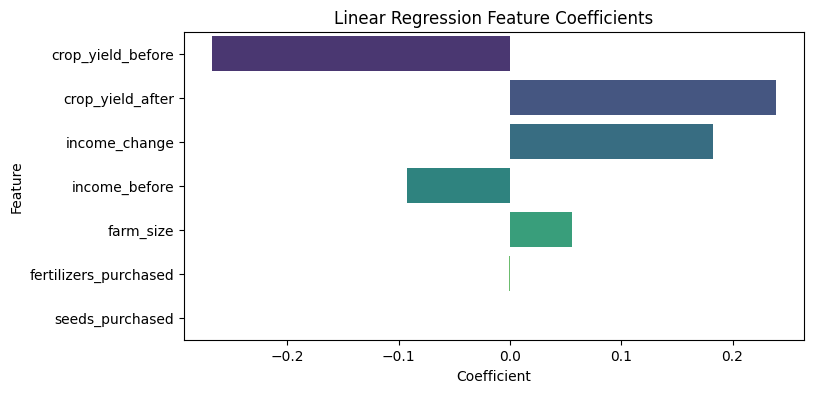

In [106]:

# Select only the most important features based on correlation heatmap
selected_features = [
    'income_before',
    'crop_yield_after',
    'farm_size',
    'seeds_purchased',
    'fertilizers_purchased',
    'crop_yield_before',
    'income_change'  # This shows the highest correlation with our target
]

# Define features (X) and target (y)
X = df[selected_features]
y = df['productivity_improvement_index']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression Modeling
print("Fitting Nultiple Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test_scaled)
print("\nLinear Regression Evaluation:")
print(f"- RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"- MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")
print(f"- R-squared: {r2_score(y_test, y_pred_lr):.4f}")

# Plot feature coefficients
lr_coefs = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=lr_coefs, x='Coefficient', y='Feature', palette='viridis')
plt.title('Linear Regression Feature Coefficients')
plt.show()

**2.Random Forest Model**


2. RANDOM FOREST

RMSE: 0.1105
MAE: 0.0848
R²: 0.8087


<ipython-input-107-63459c2bb249>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_imp, x='Importance', y='Feature', palette='Greens_d')


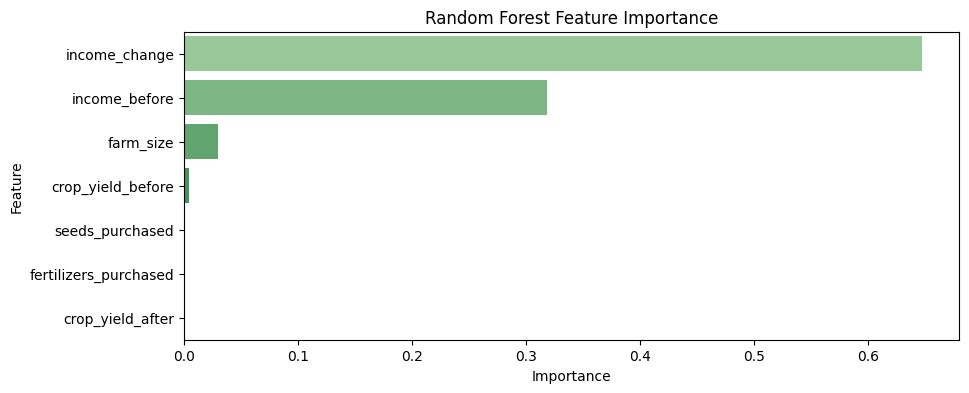

In [107]:
## 2. Random Forest
selected_features = [
    'income_before',
    'crop_yield_after',
    'farm_size',
    'seeds_purchased',
    'fertilizers_purchased',
    'crop_yield_before',
    'income_change'        # Strongest correlation (0.72)
]

# Prepare data
X = df[selected_features]
y = df['productivity_improvement_index']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n" + "="*50)
print("2. RANDOM FOREST")
print("="*50)
rf = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"\nRMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"R²: {rf_r2:.4f}")

# Feature importance
rf_imp = pd.DataFrame({'Feature': selected_features, 'Importance': rf.feature_importances_})
rf_imp = rf_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(data=rf_imp, x='Importance', y='Feature', palette='Greens_d')
plt.title('Random Forest Feature Importance')
plt.show()

3.XGBoost Model


3. XGBOOST

RMSE: 0.0681
MAE: 0.0473
R²: 0.9274


<ipython-input-108-6396b186775b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_imp, x='Importance', y='Feature', palette='Reds_d')


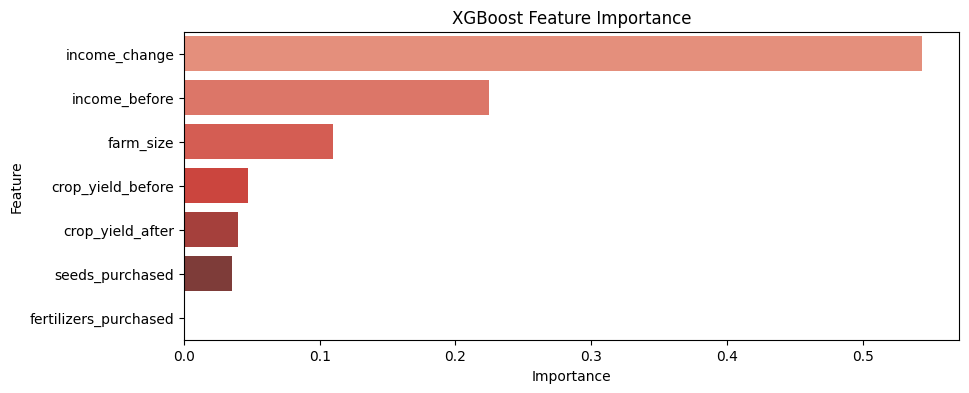

In [108]:
# 3. XGBoost (Gradient Boosting)
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
print("\n" + "="*50)
print("3. XGBOOST")
print("="*50)
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"\nRMSE: {xgb_rmse:.4f}")
print(f"MAE: {xgb_mae:.4f}")
print(f"R²: {xgb_r2:.4f}")

# Feature importance
xgb_imp = pd.DataFrame({'Feature': selected_features, 'Importance': xgb.feature_importances_})
xgb_imp = xgb_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(data=xgb_imp, x='Importance', y='Feature', palette='Reds_d')
plt.title('XGBoost Feature Importance')
plt.show()


**Models Comparison**


MODEL COMPARISON
      Linear Regression  Random Forest   XGBoost
RMSE           0.165482       0.110548  0.068086
MAE            0.126861       0.084781  0.047334
R²             0.571398       0.808727  0.927445


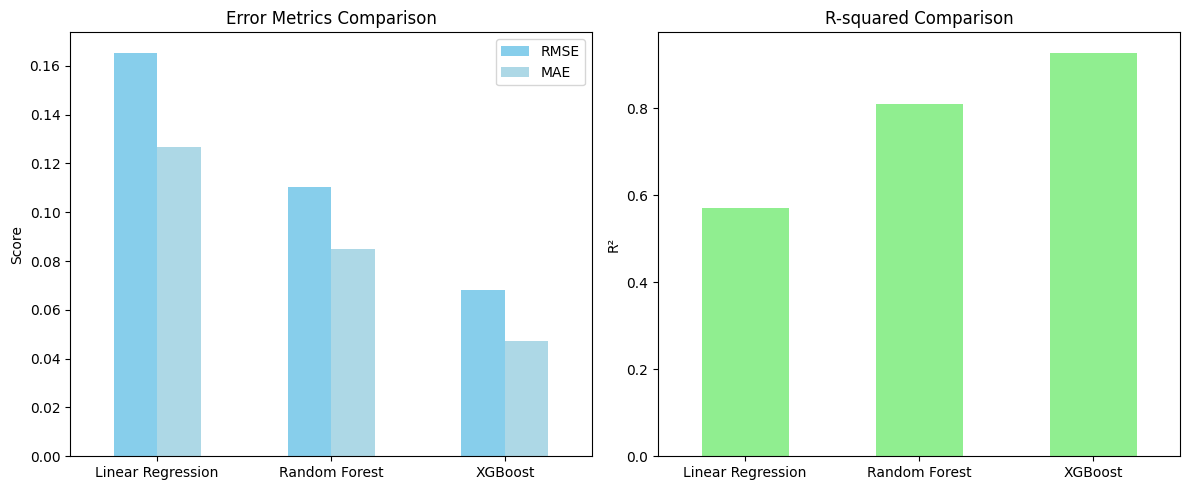

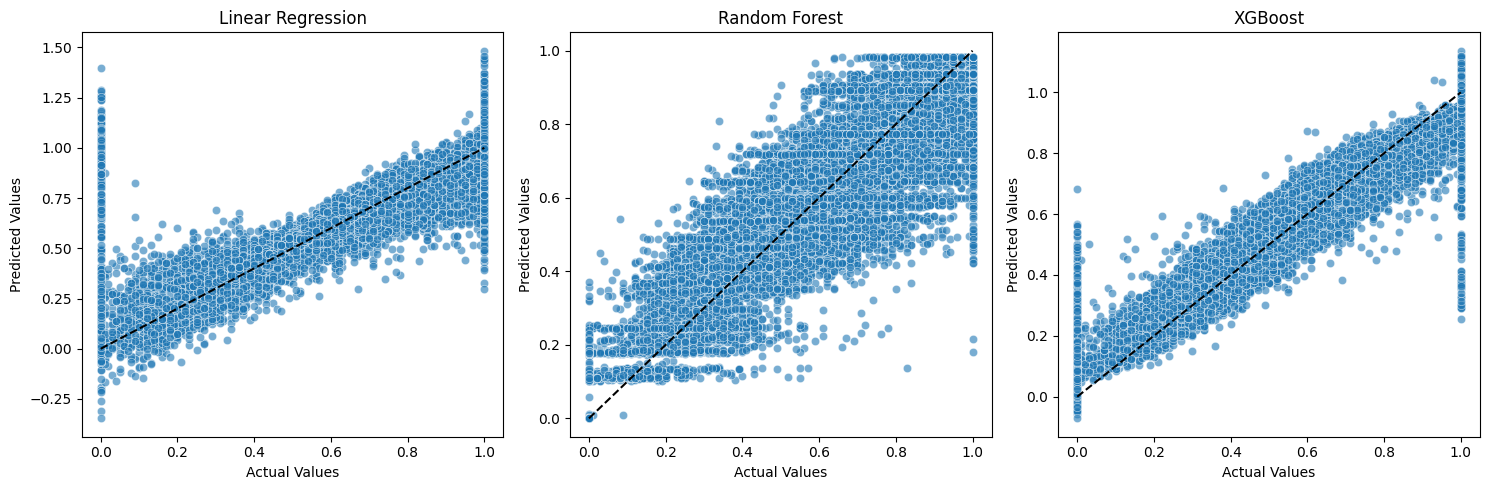

In [109]:
## Model Comparison
results = pd.DataFrame({
    'Linear Regression': [lr_rmse, lr_mae, lr_r2],
    'Random Forest': [rf_rmse, rf_mae, rf_r2],
    'XGBoost': [xgb_rmse, xgb_mae, xgb_r2]
}, index=['RMSE', 'MAE', 'R²'])

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(results)

# Visual comparison
plt.figure(figsize=(12,5))

# RMSE and MAE (lower is better)
plt.subplot(1,2,1)
results.loc[['RMSE','MAE']].T.plot(kind='bar', ax=plt.gca(), color=['skyblue','lightblue'])
plt.title('Error Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)

# R² (higher is better)
plt.subplot(1,2,2)
results.loc['R²'].plot(kind='bar', color='lightgreen')
plt.title('R-squared Comparison')
plt.ylabel('R²')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("")
## Prediction Visualization
plt.figure(figsize=(15,5))

models = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=y_test, y=preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)

plt.tight_layout()
plt.show()